In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from gpmap.simulate import MountFujiSimulation
from gpmap.simulate.mask import mask
from epistasis.models import EpistasisLinearRegression

from gpseer import GPSeer

from dask.distributed import Client

In [2]:
client = Client()

In [3]:
# Create an instance of the model. Using `from_length` makes this easy.
sim = MountFujiSimulation.from_length(3, field_strength=-1)

# add roughness, sampling from a range of values.
sim.set_roughness(range=(-1,1))
sim.set_stdeviations(.2)

map_ = sim.map('genotypes', 'phenotypes')

f, gpm = mask(sim, 0.5)

# Fit with epistasis model
model = EpistasisLinearRegression(order=1, model_type='local')

# Initialize a seer.
bins = np.arange(-1,10, .1)
seer = GPSeer(gpm, model, client=client, bins=bins, genotypes='complete', perspective='single')

# Sample posterior.
seer.run_pipeline()
seer.sample_pipeline(n_samples=10)

In [3]:
from gpseer import load

In [4]:
seer = load('database', client)

In [5]:
r = seer.results

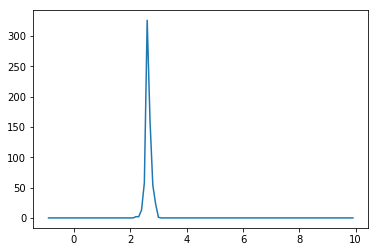

In [6]:
i = -3
x = r.index[1:]
y = r.iloc[:,i][1:]
g = r.columns[i]
#print(g)
#print(map_[g])

plt.plot(x,y)